In [95]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import user, password, host
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from random import sample


In [ ]:
def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

sql = """
select 
bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
from properties_2017
join propertylandusetype using (propertylandusetypeid)
where propertylandusedesc = "Single Family Residential"
"""

In [65]:
df = pd.read_sql(sql, get_db_url("zillow"))
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [67]:
df.isnull().any()


bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [68]:
df = df.replace(r'^\s*$', np.nan, regex=True)


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [70]:
df.dropna().shape


(2140235, 7)

In [71]:
df = df.dropna()


In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [73]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [74]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [75]:
imputer = SimpleImputer(strategy='median')  # build imputer

imputer.fit(train[['yearbuilt']]) # fit to train

# transform the data
train[['yearbuilt']] = imputer.transform(train[['yearbuilt']])
validate[['yearbuilt']] = imputer.transform(validate[['yearbuilt']])
test[['yearbuilt']] = imputer.transform(test[['yearbuilt']])

In [76]:
train_scaled = train.copy()


In [79]:
# make, fit, use:
columns_to_scale = ['bedroomcnt', 'bathroomcnt','taxvaluedollarcnt']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [80]:
train_scaled.head(2)


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1567873,0.200000,0.03125,1248.0,0.002124,1950.0,2712.21,6037.0
1218138,0.133333,0.06250,1326.0,0.014915,1950.0,16539.04,6037.0


ValueError: Contour levels must be increasing

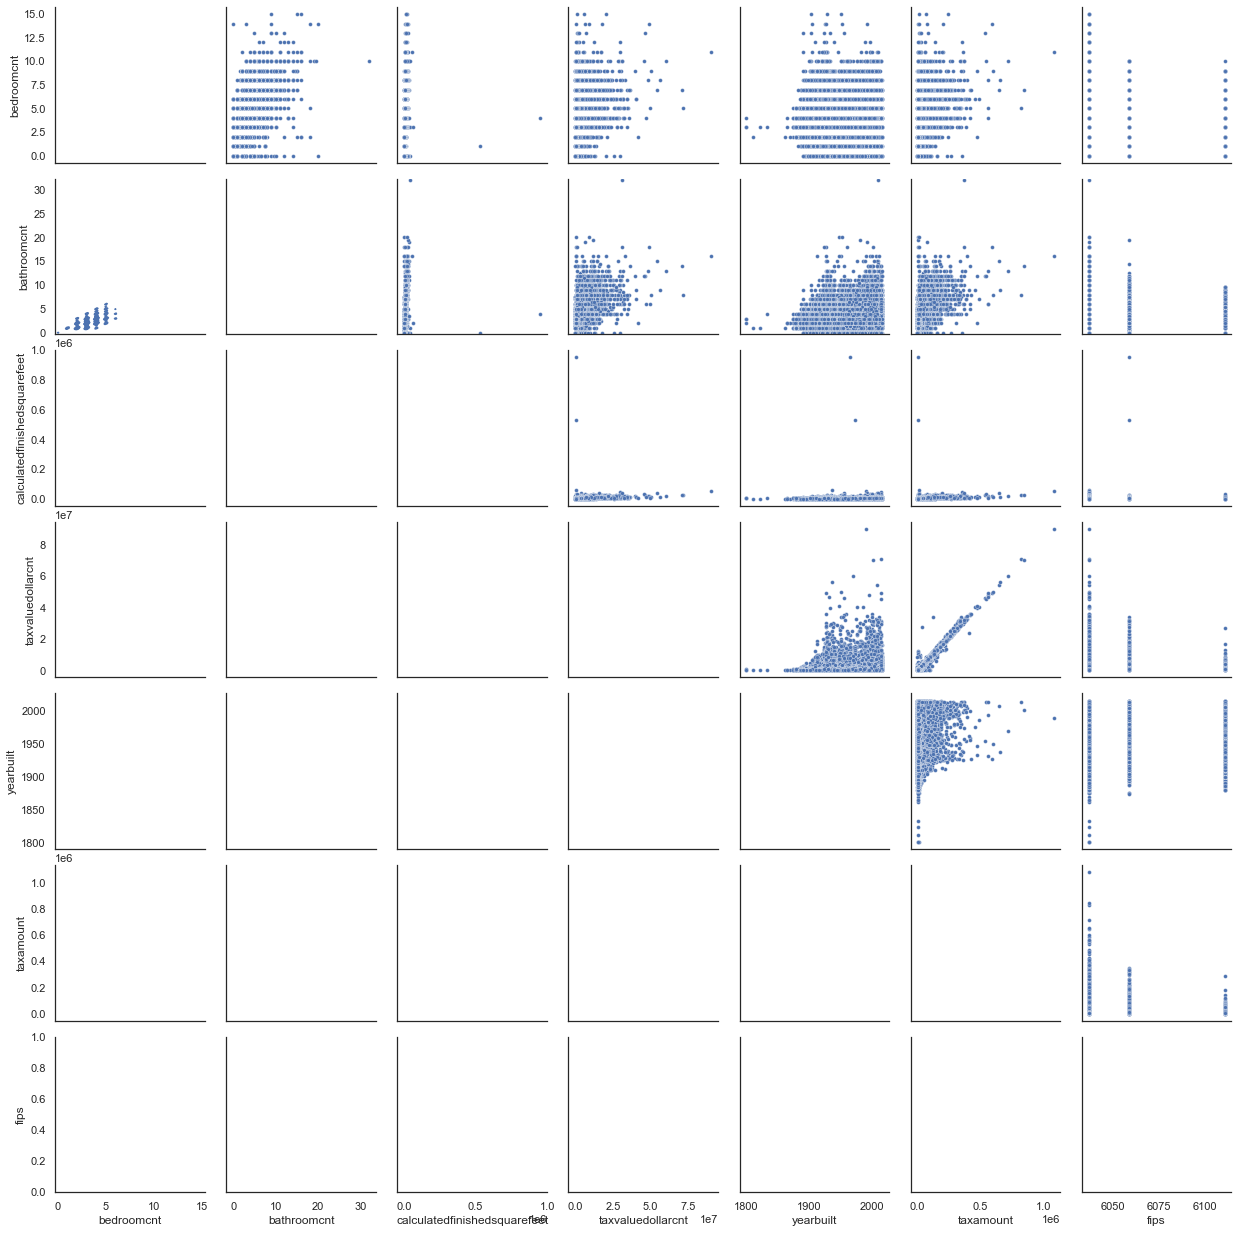

In [84]:
sns.set_theme(style="white")


g = sns.PairGrid(train, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

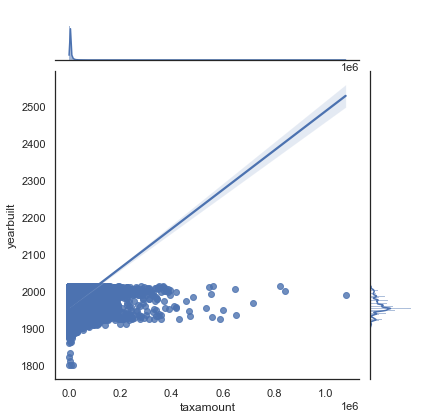

In [87]:
sns.jointplot(data=train, x='taxamount', y='yearbuilt',
             kind='reg')
plt.show()

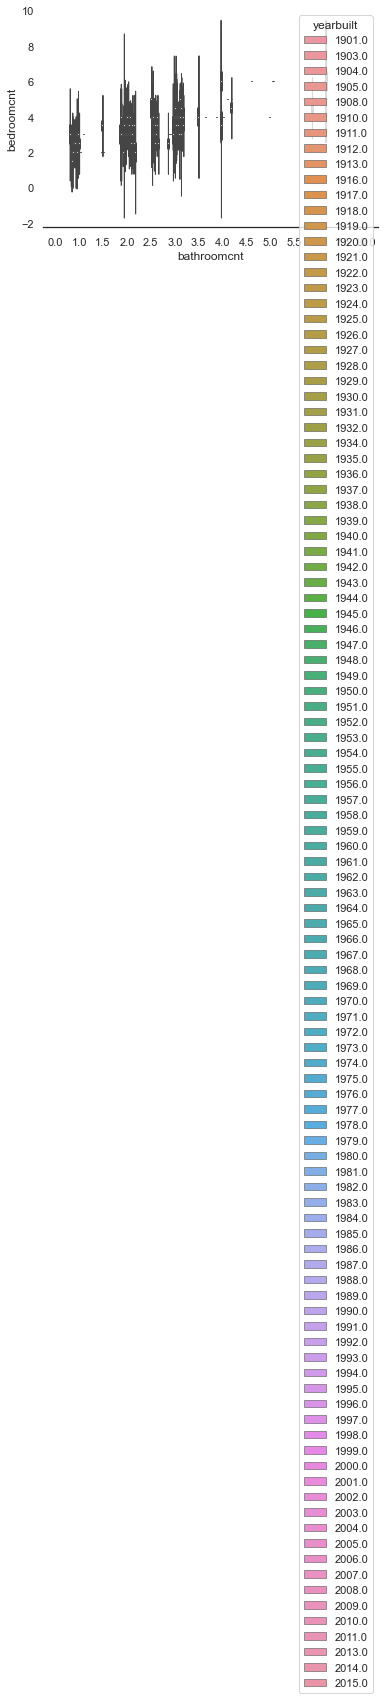

In [108]:

trsame=train.sample(1_000)


sns.violinplot(data=trsame, x="bathroomcnt", y="bedroomcnt", hue="yearbuilt",orient='v', linewidth=1,)
sns.despine(left=True)

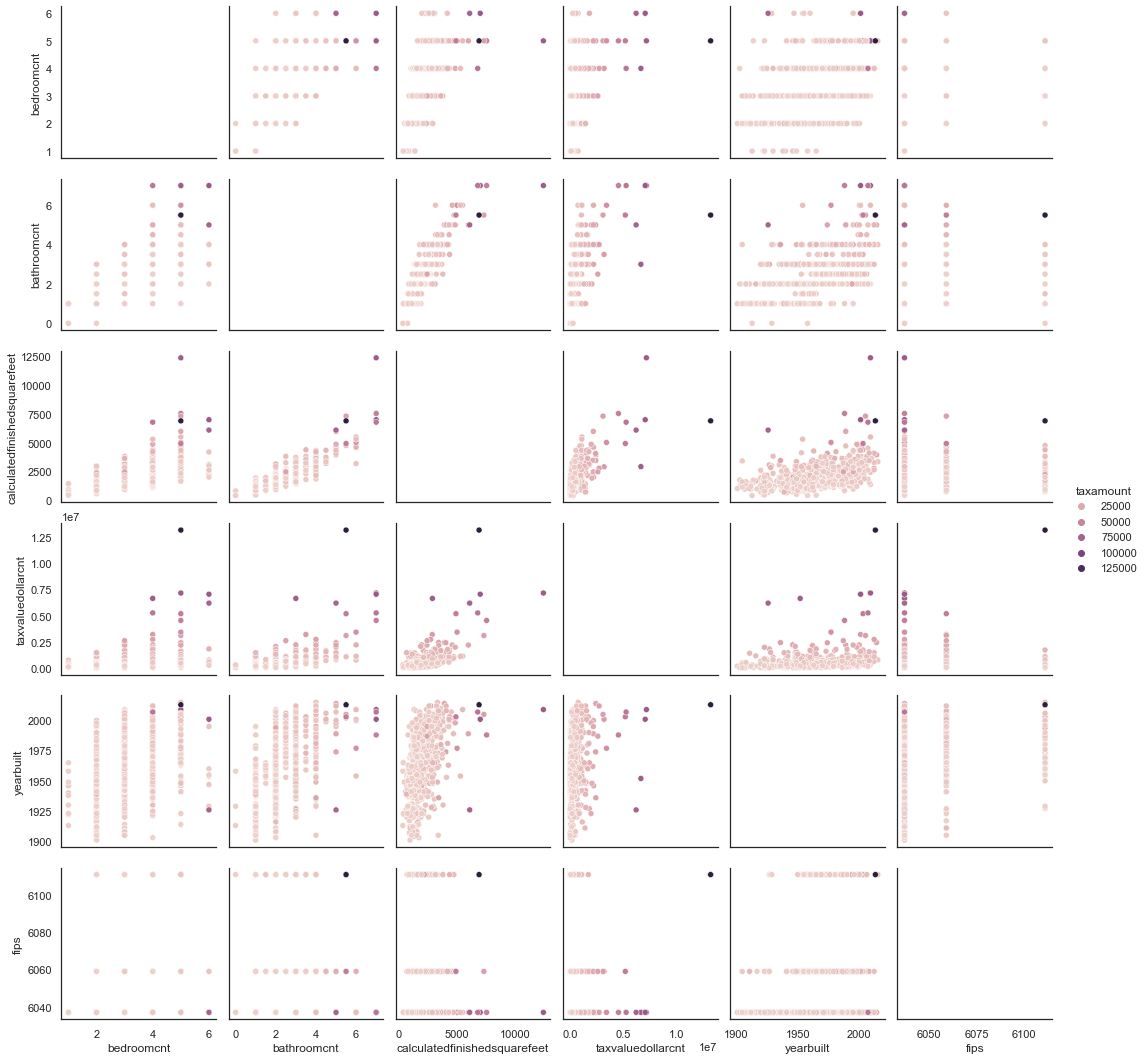

In [106]:
sns.pairplot(trsame, hue="taxamount")

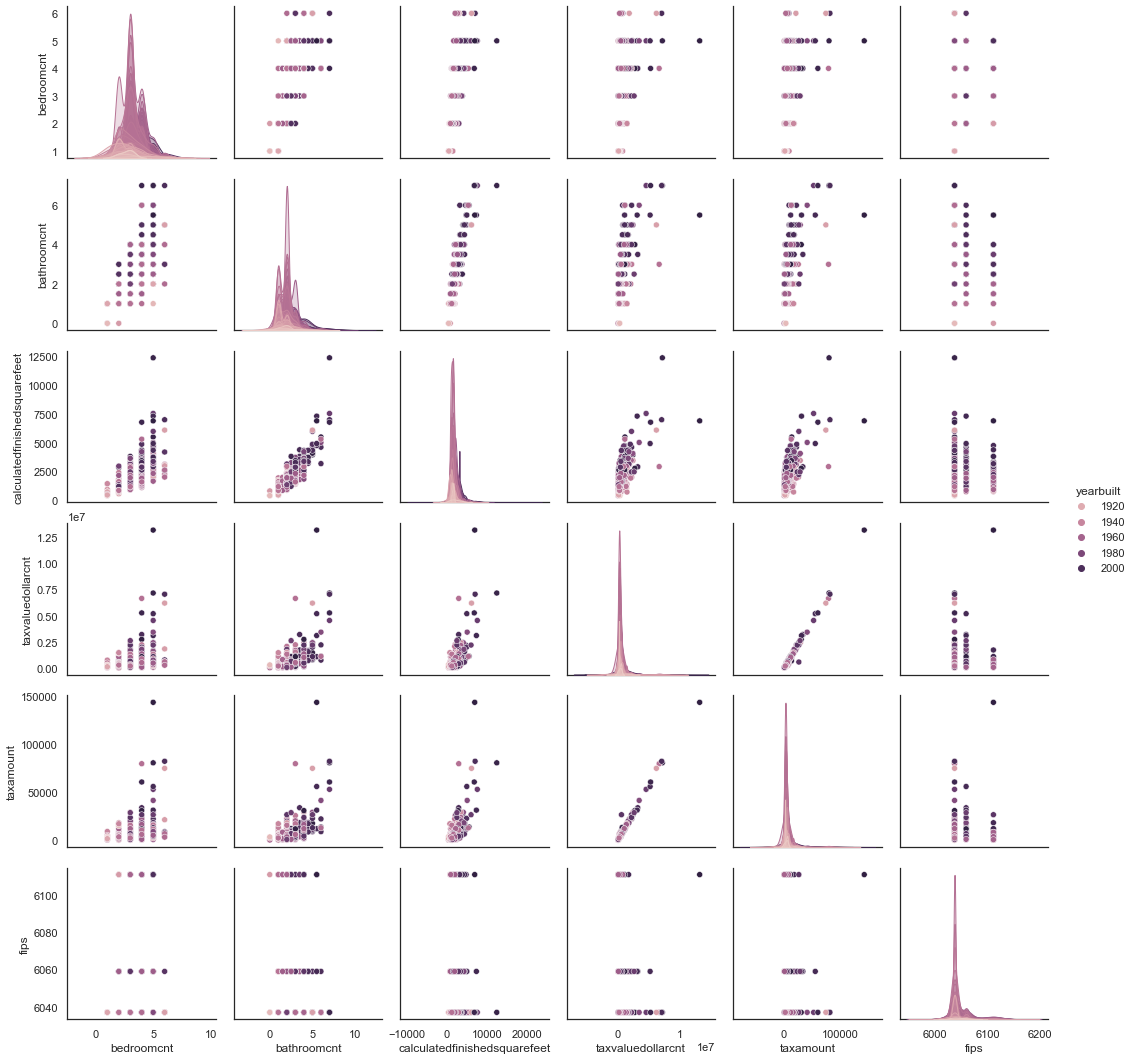

In [107]:
sns.pairplot(trsame, hue="yearbuilt")

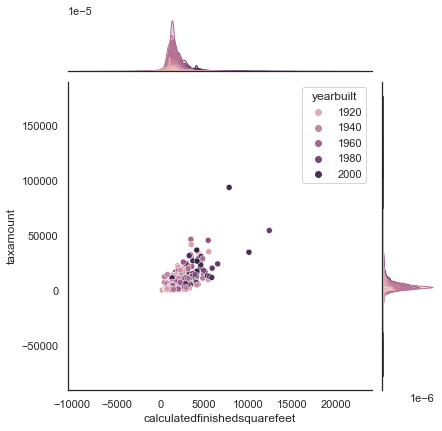

In [117]:

sns.jointplot(x="calculatedfinishedsquarefeet", y="taxamount", data=trsame, hue="yearbuilt")

###kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

<AxesSubplot:>

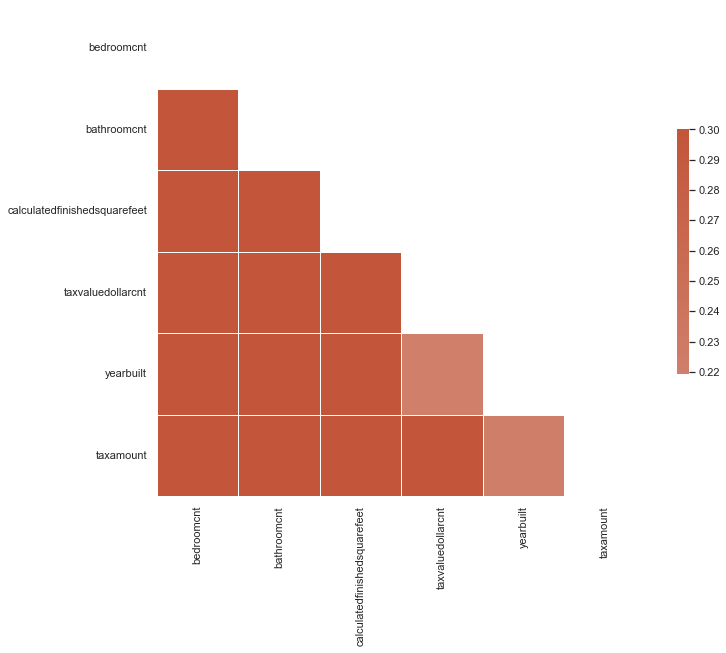

In [121]:
corr = trsame.drop(columns='fips').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [123]:
sns.jointplot(data=trsame
   x="calculatedfinishedsquarefeet", y="taxamount", hue="yearbuilt",
    kind="kde"
)

SyntaxError: invalid syntax (2890200781.py, line 2)